In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import leaguedata as ld

In [6]:
matches = ld.get_all_matches()

print(matches[1].gold_types())
matches[1].gold_type('goldblue')

['golddiff', 'goldblue', 'goldred', 'goldblueTop', 'goldblueJungle', 'goldblueMiddle', 'goldblueADC', 'goldblueSupport', 'goldredTop', 'goldredJungle', 'goldredMiddle', 'goldredADC', 'goldredSupport']


array([2415, 2415, 2705, 4108, 5511, 6797, 7637, 8953, 10183, 11419,
       12956, 14294, 16027, 18288, 19698, 21528, 23855, 25225.0, 26323.0,
       27282.0, 28330.0, 29856.0, 31486.0, 32988.0, 35274.0, 36334.0,
       39179.0, 40320.0, 42132.0, 43767.0, 45871.0, 48112.0, 49259.0,
       51179.0, 53284.0, 55462.0, 56911.0, 57702.0, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan], dtype=object)

In [3]:
gold = ld.gold


In [4]:
matchinfo = ld.matchinfo
ld.match_num_address(1)

'http://matchhistory.na.leagueoflegends.com/en/#match-details/TRLH1/30054?gameHash=055b17da8456fdc8'

In [7]:
kills = ld.kills

In [2]:
match_a = ld.match('http://matchhistory.na.leagueoflegends.com/en/#match-details/TRLH1/30030?gameHash=fbb300951ad8327c')
if match_a.bResult():
    print('Blue won!')

Blue won!


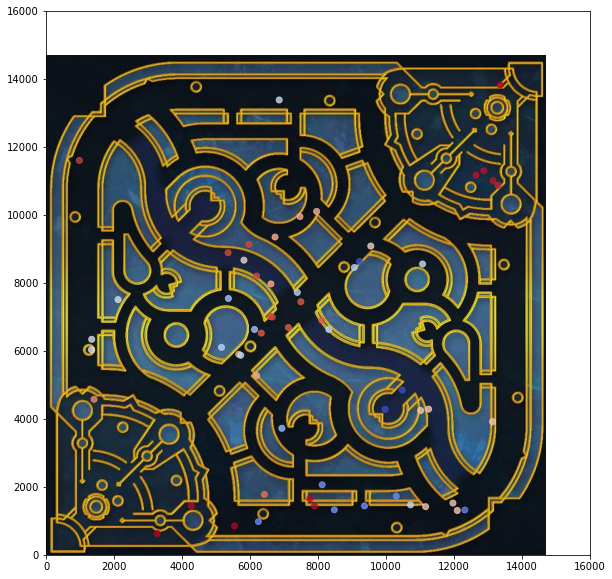

In [9]:
map_img = plt.imread("map.png")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(map_img, extent=[0,14700,0,14700])

plt.xlim(0, 16000)
plt.ylim(0, 16000)


for i in range(1000, 1002):
    match_address = matchinfo['Address'][i]

    match_kills = kills.loc[kills['Address'] == match_address]

    match = matchinfo.loc[matchinfo['Address'] == match_address]
    bResult = match['bResult']

    # print(bResult)

    kill_x = match_kills.iloc[:, 9].values.astype(float)
    kill_y = match_kills.iloc[:, 10].values.astype(float)
    kill_t = match_kills.iloc[:, 2].values.astype(float)
    ax.scatter(kill_x, kill_y, c=kill_t, cmap=plt.cm.coolwarm, alpha=0.8)
    
plt.show()

In [51]:
matchinfo.iloc[0]['Address']

print(gold.iloc[1])

Address    http://matchhistory.na.leagueoflegends.com/en/...
Type                                                golddiff
min_1                                                      0
min_2                                                      0
min_3                                                    -26
                                 ...                        
min_91                                                   NaN
min_92                                                   NaN
min_93                                                   NaN
min_94                                                   NaN
min_95                                                   NaN
Name: 1, Length: 97, dtype: object


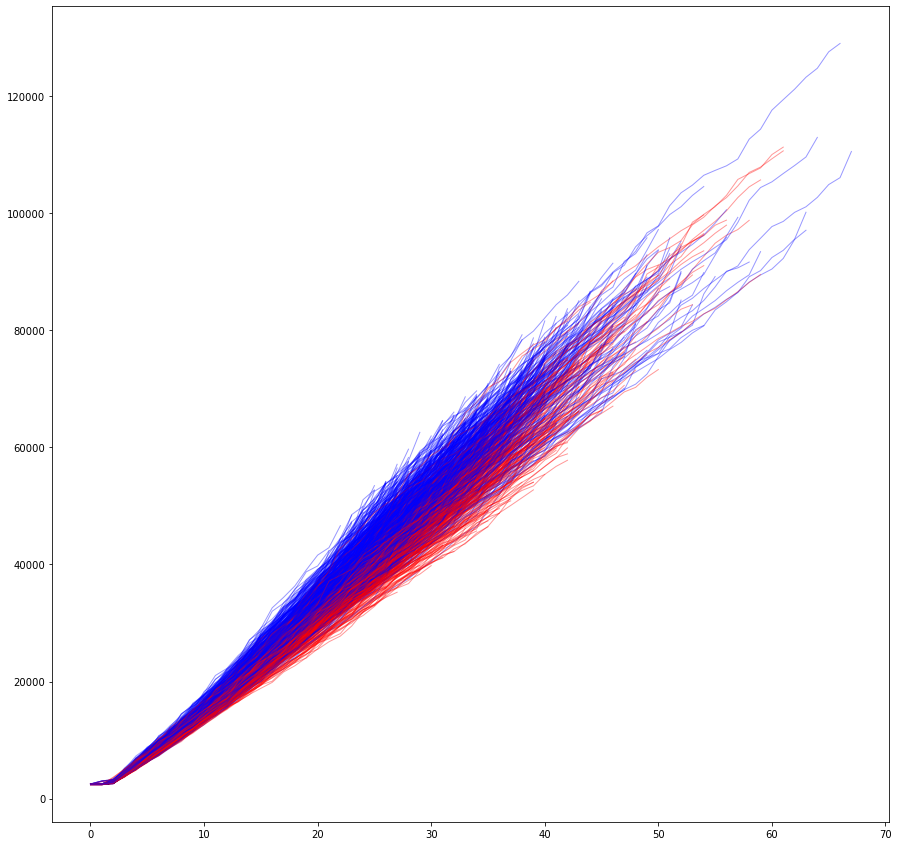

In [12]:
fig, axs = plt.subplots(1, figsize=(15,15))

for match_num in range(8000, 9000):
    match_gold_row = gold.iloc[match_num]
    
    match = matchinfo.loc[matchinfo['Address'] == match_gold_row['Address']]
    
    bResult = match['bResult']
    
    match_gold = match_gold_row[2:]
    
    x = range(0, len(match_gold))
    
    if bResult.values[0]:
        axs.plot(x,match_gold, "b", linewidth=1, alpha = 0.4)
    else:
        axs.plot(x,match_gold, "r", linewidth=1, alpha = 0.4)
    
plt.show()